# Business Understanding

#### (i) Business Objective
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, impyling that the 'best' sectors and countries are the ones 'where most investors are investing'.

**Constraints for investing**
1. Wants to invest between **5 to 15 million USD** per round of investment
2. Wants to invest only in **English speaking countries** due to ease of communication

#### (ii) Goals of Data Analysis
- Investment Type Analysis - Comparing the typical investment amounts in the venture, angel, seed, private equity, etc. so as to choose the type that is best suited for their strategy.
- Country Analysis - Countries that have been the most heavily invested in the past.
- Sector Analysis - Understanding the distribution of investment across the eight main sectors.

# Data Understanding and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Reading and Understanding Companies data

In [2]:
companies = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt', sep='\t', encoding='palmos')
companies.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [3]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Laser-Light-Engines,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [4]:
companies['permalink'] = companies['permalink'].str.lower()

In [5]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
companies.shape

(66368, 10)

In [7]:
column_names = companies.columns
for i in column_names:
  print('{} is unique: {}'.format(i, companies[i].is_unique))

permalink is unique: True
name is unique: False
homepage_url is unique: False
category_list is unique: False
status is unique: False
country_code is unique: False
state_code is unique: False
region is unique: False
city is unique: False
founded_at is unique: False


**Observations**
1. permalink contains the unique values and can be made as unique key.
2. No. of unique companies are 66368.

## 2. Reading and Understanding Rounds2 data

In [8]:
rounds2 = pd.read_csv('rounds2.csv', encoding='palmos')
rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [9]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [10]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [11]:
rounds2.shape

(114949, 6)

In [12]:
column_names = rounds2.columns
for i in column_names:
  print('{} is unique: {}'.format(i, rounds2[i].is_unique))

company_permalink is unique: False
funding_round_permalink is unique: True
funding_round_type is unique: False
funding_round_code is unique: False
funded_at is unique: False
raised_amount_usd is unique: False


In [13]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [14]:
len(rounds2['company_permalink'].unique().tolist())

66368

In [15]:
# funding round code and raised amount usd are the two fields with missing values
# filling missing values in raised amount usd with mean of value in the group funding round type
rounds2['raised_amount_usd'] = rounds2.groupby('funding_round_type').transform(lambda x: x.fillna(x.mean()))

In [16]:
rounds2.shape

(114949, 6)

In [17]:
# rounds2 companies that do not exist in companies tables
filter_list = companies['permalink'].unique().tolist()
excluded = rounds2[~rounds2['company_permalink'].isin(filter_list)]
len(excluded)

0

**Observations**
1. All the companies in the rounds2 table are present in the companies table. 
2. Funding_Round_Code and Raised_Amount_Usd are the two columns that contains null values.
3. Funding_Round_Code column does not play any role in our analysis and hence cleaning of this column can be ignored.
4. Raised_Amount_Usd column null values has been replaced by the mean of value in the funding round type.

## 3. Merging companies & Rounds2 dataframe into master frame

In [18]:
master_frame = companies.merge(rounds2, how='inner', left_on='permalink', right_on='company_permalink')
master_frame.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.174895e+07
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,7.000000e+05
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878e+06
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1.174895e+07
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,4.125000e+04
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,4.336000e+04
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,7.194910e+05
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3.000000e+06


In [19]:
master_frame.shape

(114949, 16)

In [20]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd              0
dtype: int64

In [21]:
master_frame = master_frame[(master_frame.funding_round_type == 'angel')
                           |(master_frame.funding_round_type == 'seed')
                           |(master_frame.funding_round_type == 'venture')
                           |(master_frame.funding_round_type == 'private_equity')]
master_frame.shape

(94397, 16)

# Investment Analysis

In [22]:
pd.set_option('precision',40)
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,958694.46975310496054589748382568359375
private_equity,73308593.02944281697273254394531250000000
seed,719817.99690705235116183757781982421875
venture,11748949.12949095666408538818359375000000


# Country Analysis

In [23]:
df = master_frame[master_frame['funding_round_type'] == 'venture'].groupby('country_code').sum()
top9 = df.sort_values('raised_amount_usd', ascending = False)[:9]
top9

,raised_amount_usd
country_code,
USA,448746246202.17150878906250000000
CHN,45980119167.72274017333984375000
GBR,23159366800.11347198486328125000
IND,16365682171.75428009033203125000
CAN,10640737738.65407180786132812500
DEU,9025720223.52365875244140625000
ISR,8246894779.76182270050048828125
FRA,8058465272.80529785156250000000
JPN,3880630372.69753646850585937500


**Observations**
1. USA, GBR and IND are the top English speaking countries where most of the companies are investing in the venture type funding 

# Sector Analysis

In [24]:
mappings = pd.read_csv('mapping.csv', encoding = 'palmos')
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [25]:
mappings.shape

(688, 10)

In [26]:
mappings['main_sector'] = pd.get_dummies(mappings).idxmax(1)
mappings.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [27]:
master_frame = master_frame.merge(mappings[['main_sector','category_list']], how='inner', on='category_list')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Entertainment
2,/organization/anthill-magazine,Anthill Magazine,http://anthillonline.com/,Media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,NaN,09-04-2015,600000.0,Entertainment
3,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.0,Entertainment
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,NaN,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,NaN,05-08-2005,55464142.0,Entertainment


In [28]:
master_frame.groupby('main_sector').count()[['permalink']]

,permalink
main_sector,
Automotive & Sports,483
Blanks,2497
Cleantech / Semiconductors,9295
Entertainment,2687
Health,3545
Manufacturing,2680
"News, Search and Messaging",4593
Others,12738
"Social, Finance, Analytics, Advertising",2970


In [29]:
master_frame.shape

(41488, 17)

In [30]:
master_frame = master_frame[master_frame['main_sector'] != 'Blanks']
master_frame.shape

(38991, 17)

# Sector Analysis 2

## D1 frame (USA)

In [31]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
print(D1.shape)
D1.head(10)

(5862, 17)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector
42,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,11748949.12948952801525592803955078125,"News, Search and Messaging"
48,/organization/2wire,2Wire,http://www.2wire.com,Curated Web,acquired,USA,CA,SF Bay Area,San Jose,NaN,/organization/2wire,/funding-round/185ee921517111d9e5b70cc618db87bc,venture,G,12-05-2003,11748949.12948952801525592803955078125,"News, Search and Messaging"
70,/organization/affinitylabs,Affinity Labs,http://www.affinitylabs.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/organization/affinitylabs,/funding-round/d3101588cbc317f9d5e33ffd5ecbf538,venture,A,01-01-2006,11748949.12948952801525592803955078125,"News, Search and Messaging"
74,/organization/akonix-systems,Akonix Systems,http://www.akonix.com,Curated Web,operating,USA,CA,San Diego,San Diego,01-01-2000,/organization/akonix-systems,/funding-round/62d574f6151124d62742c2bdc68c64be,venture,NaN,09-12-2003,11000000.00000000000000000000000000000,"News, Search and Messaging"
78,/organization/allseated,AllSeated,http://www.allseated.com,Curated Web,operating,USA,NY,New York City,New York,01-01-2011,/organization/allseated,/funding-round/92443f815909d2cac8036b60e6d08bad,venture,NaN,18-05-2015,11748949.12948952801525592803955078125,"News, Search and Messaging"
80,/organization/allurent,Allurent,http://www.allurent.com,Curated Web,acquired,USA,MA,Boston,Cambridge,01-01-2005,/organization/allurent,/funding-round/ab7a30273ea4ffcebee5d1f9e2747e94,venture,B,12-11-2007,11748949.12948952801525592803955078125,"News, Search and Messaging"
81,/organization/alwayson,AlwaysOn,http://aonetwork.com,Curated Web,operating,USA,CA,SF Bay Area,San Francisco,NaN,/organization/alwayson,/funding-round/2b97d89e73fb3a567a6e06a18f74afdb,venture,A,18-04-2014,11748949.12948952801525592803955078125,"News, Search and Messaging"
82,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,Curated Web,acquired,USA,CA,SF Bay Area,Oakland,NaN,/organization/amberpoint,/funding-round/2c6a1960ca55d6e899047afe10a9cfcf,venture,B,15-11-2002,13600000.00000000000000000000000000000,"News, Search and Messaging"
83,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,Curated Web,acquired,USA,CA,SF Bay Area,Oakland,NaN,/organization/amberpoint,/funding-round/7e9c73a85d172b779c254eaabf6fd5f0,venture,NaN,23-04-2007,9000000.00000000000000000000000000000,"News, Search and Messaging"
92,/organization/appycouple,Appy Couple,http://www.appycouple.com,Curated Web,operating,USA,NY,New York City,New York,01-01-2011,/organization/appycouple,/funding-round/07a2a16adb72fcec532ec9cb88cae9de,venture,NaN,30-05-2013,11748949.12948952801525592803955078125,"News, Search and Messaging"


In [32]:
D1.loc[:,'count_of_investment_in_main_sector'] = D1.groupby('main_sector')['raised_amount_usd'].transform('count')
D1.loc[:,'sum_of_investment_in_main_sector'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D1.head()

/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
42,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,11748949.12948952801525592803955078125,"News, Search and Messaging",552,5075689392.337421417236328125
48,/organization/2wire,2Wire,http://www.2wire.com,Curated Web,acquired,USA,CA,SF Bay Area,San Jose,NaN,/organization/2wire,/funding-round/185ee921517111d9e5b70cc618db87bc,venture,G,12-05-2003,11748949.12948952801525592803955078125,"News, Search and Messaging",552,5075689392.337421417236328125
70,/organization/affinitylabs,Affinity Labs,http://www.affinitylabs.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/organization/affinitylabs,/funding-round/d3101588cbc317f9d5e33ffd5ecbf538,venture,A,01-01-2006,11748949.12948952801525592803955078125,"News, Search and Messaging",552,5075689392.337421417236328125
74,/organization/akonix-systems,Akonix Systems,http://www.akonix.com,Curated Web,operating,USA,CA,San Diego,San Diego,01-01-2000,/organization/akonix-systems,/funding-round/62d574f6151124d62742c2bdc68c64be,venture,NaN,09-12-2003,11000000.00000000000000000000000000000,"News, Search and Messaging",552,5075689392.337421417236328125
78,/organization/allseated,AllSeated,http://www.allseated.com,Curated Web,operating,USA,NY,New York City,New York,01-01-2011,/organization/allseated,/funding-round/92443f815909d2cac8036b60e6d08bad,venture,NaN,18-05-2015,11748949.12948952801525592803955078125,"News, Search and Messaging",552,5075689392.337421417236328125


In [33]:
D1['raised_amount_usd'].sum()

55021905458.13793

In [34]:
D1.groupby('main_sector')['main_sector'].count().reset_index(name='count').sort_values('count', ascending = False).head()

,main_sector,count
6,Others,2020
1,Cleantech / Semiconductors,1674
3,Health,574
5,"News, Search and Messaging",552
4,Manufacturing,435


In [35]:
D1[(D1['main_sector']=='Others') & (D1['raised_amount_usd']==D1[D1['main_sector']=='Others']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
20416,/organization/spidercloud-wireless,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,01-01-2007,/organization/spidercloud-wireless,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NaN,06-01-2015,14999999.0,Others,2020,18978004607.8110198974609375


In [36]:
D1[(D1['main_sector']=='Cleantech / Semiconductors') & (D1['raised_amount_usd']==D1[D1['main_sector']=='Cleantech / Semiconductors']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
33326,/organization/intermolecular,Intermolecular,http://www.intermolecular.com,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,01-01-2004,/organization/intermolecular,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,NaN,10-03-2011,14999999.0,Cleantech / Semiconductors,1674,15690798421.30816650390625
33880,/organization/zenverge,Zenverge,http://www.zenverge.com,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,01-01-2005,/organization/zenverge,/funding-round/f6f427e7f16677297e285205fafd351d,venture,B,31-10-2007,14999999.0,Cleantech / Semiconductors,1674,15690798421.30816650390625


## D2 Dataframe (GBR)

In [37]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
print(D2.shape)

(407, 17)


In [38]:
D2.loc[:,'count_of_investment_in_main_sector'] = D2.groupby('main_sector')['raised_amount_usd'].transform('count')
D2.loc[:,'sum_of_investment_in_main_sector'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2.head(10)

/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
77,/organization/allpeers,AllPeers,http://www.techcrunch.com/2008/03/03/much-hype...,Curated Web,closed,GBR,K2,London,Oxford,01-08-2004,/organization/allpeers,/funding-round/cbc8fb6c27e73361f6b4a658a063c396,venture,A,01-03-2006,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375
326,/organization/digital-vega,Digital Vega,http://www.digitalvega.com,Curated Web,operating,GBR,H9,London,London,NaN,/organization/digital-vega,/funding-round/1f9f648818e8265979cbf3eda655e2ad,venture,A,01-01-2012,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375
417,/organization/famecount,Starcount,http://www.starcount.com/,Curated Web,operating,GBR,E2,London,Brighton,01-01-2010,/organization/famecount,/funding-round/f9e03800d455fd03294b3978c4ca84da,venture,NaN,11-11-2014,7464266.00000000000000000000000000000,"News, Search and Messaging",43,421876346.68336391448974609375
760,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/18f690ddb540ebd25263e1cf464ae261,venture,C,19-01-2011,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375
761,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/1900b9320ca70a94f8a98a0d2c9c7edd,venture,C,21-09-2010,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375
762,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/20a3de0a131d495657586a2734b95adf,venture,C,13-10-2010,7400000.00000000000000000000000000000,"News, Search and Messaging",43,421876346.68336391448974609375
763,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/4e220e601ed65a5d6ab04f3cb9717214,venture,A,08-05-2007,6000000.00000000000000000000000000000,"News, Search and Messaging",43,421876346.68336391448974609375
764,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/7b223ead6d8f78786228d6ce4d437ff4,venture,A,14-11-2007,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375
766,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/cd9b496583e782dd573143b0305de1f6,venture,D,19-04-2012,10000000.00000000000000000000000000000,"News, Search and Messaging",43,421876346.68336391448974609375
769,/organization/mysupermarket,mySupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,/organization/mysupermarket,/funding-round/f64ca18c1d9e4a972de8ff272b7f8692,venture,A,28-01-2008,11748949.12948952801525592803955078125,"News, Search and Messaging",43,421876346.68336391448974609375


In [39]:
D2['raised_amount_usd'].sum()

3842107929.524568

In [40]:
D2.groupby('main_sector')['main_sector'].count().reset_index(name='count').sort_values('count', ascending = False).head()

,main_sector,count
6,Others,132
1,Cleantech / Semiconductors,118
5,"News, Search and Messaging",43
2,Entertainment,40
4,Manufacturing,28


In [41]:
D2[(D2['main_sector']=='Others') & (D2['raised_amount_usd']==D2[D2['main_sector']=='Others']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
16304,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,/organization/myoptique-group,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.0,Others,132,1250916640.791112422943115234375


In [42]:
D2[(D2['main_sector']=='Cleantech / Semiconductors') & (D2['raised_amount_usd']==D2[D2['main_sector']=='Cleantech / Semiconductors']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
11391,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NaN,/organization/onyvax,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.0,Cleantech / Semiconductors,118,1082314533.812853336334228515625


## D3 Dataframe (IND)

In [43]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & (master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
print(D3.shape)

(208, 17)


In [44]:
D3.loc[:,'count_of_investment_in_main_sector'] = D3.groupby('main_sector')['raised_amount_usd'].transform('count')
D3.loc[:,'sum_of_investment_in_main_sector'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3.head(10)

/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00000000000000000000000000000,Entertainment,19,190141593.035916268825531005859375
188,/organization/bluestone-com,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
333,/organization/dineout,dineout,http://www.dineout.co.in,Curated Web,operating,IND,7,Delhi,Delhi,NaN,/organization/dineout,/funding-round/030be6d1c5b8072ca32c9e6150b561bc,venture,A,24-01-2014,11748949.12948952801525592803955078125,"News, Search and Messaging",35,351357210.424384891986846923828125
456,/organization/fourinteractive,Four Interactive,http://www.fourint.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2006,/organization/fourinteractive,/funding-round/a0ef5f6e0c69a9060c1649c076999336,venture,B,01-09-2007,10000000.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
865,/organization/people-interactive-india,People Interactive (India),NaN,Curated Web,operating,IND,16,Mumbai,Mumbai,NaN,/organization/people-interactive-india,/funding-round/676779479b50d51083380efe537c2647,venture,NaN,10-03-2006,8000000.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
956,/organization/quikr-india,Quikr,http://www.quikr.com,Curated Web,operating,IND,16,Mumbai,Mumbai,12-01-2008,/organization/quikr-india,/funding-round/9e35c5ba470175ec270fa3f0a91b861d,venture,D,09-05-2011,8000000.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
957,/organization/quikr-india,Quikr,http://www.quikr.com,Curated Web,operating,IND,16,Mumbai,Mumbai,12-01-2008,/organization/quikr-india,/funding-round/c1fe5a6efa7446f94011ea1fc7e85b31,venture,C,31-03-2010,6000000.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
982,/organization/redbus-in,redBus.in,http://www.redbus.in,Curated Web,acquired,IND,19,Bangalore,Bangalore,01-01-2006,/organization/redbus-in,/funding-round/484ff1c76277bcd7e4735e873201ed5f,venture,C,01-03-2011,6428770.00000000000000000000000000000,"News, Search and Messaging",35,351357210.424384891986846923828125
1270,/organization/traffline,Traffline,http://traffline.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-01-2011,/organization/traffline,/funding-round/197e2e0b2753c9169b2aece23cab8986,venture,A,06-12-2013,11748949.12948952801525592803955078125,"News, Search and Messaging",35,351357210.424384891986846923828125
1271,/organization/traffline,Traffline,http://traffline.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-01-2011,/organization/traffline,/funding-round/d862c8db861741be723996e853e8a1f2,venture,B,01-10-2014,11748949.12948952801525592803955078125,"News, Search and Messaging",35,351357210.424384891986846923828125


In [45]:
D3['raised_amount_usd'].sum()

2091967359.9706936

In [46]:
D3.groupby('main_sector')['main_sector'].count().reset_index(name='count').sort_values('count', ascending = False).head()

,main_sector,count
6,Others,89
5,"News, Search and Messaging",35
3,Health,21
2,Entertainment,19
7,"Social, Finance, Analytics, Advertising",16


In [47]:
D3[(D3['main_sector']=='Others') & (D3['raised_amount_usd']==D3[D3['main_sector']=='Others']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
3167,/organization/eximsoft-trianz,EximSoft-Trianz,http://www.trianz.com,Software,acquired,IND,19,Bangalore,Bangalore,01-01-1997,/organization/eximsoft-trianz,/funding-round/4bb3bc5f0a816ef3040944eb4632924d,venture,NaN,16-01-2007,14000000.0,Others,89,896135879.14366519451141357421875
15781,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,01-01-2010,/organization/firstcry-com,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,B,13-02-2012,14000000.0,Others,89,896135879.14366519451141357421875
16299,/organization/myntra,Myntra,http://www.myntra.com,E-Commerce,acquired,IND,19,Bangalore,Bangalore,01-01-2007,/organization/myntra,/funding-round/d7a04ce178d3b08fa6b5d2615cce0d8e,venture,B,04-03-2011,14000000.0,Others,89,896135879.14366519451141357421875


In [48]:
D3[(D3['main_sector']=='News, Search and Messaging') & (D3['raised_amount_usd']==D3[D3['main_sector']=='News, Search and Messaging']['raised_amount_usd'].max())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,main_sector,count_of_investment_in_main_sector,sum_of_investment_in_main_sector
14061,/organization/imimobile,IMImobile,http://openhouse.imimobile.com,Mobile,ipo,IND,2,Hyderabad,Hyderabad,01-01-1999,/organization/imimobile,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,NaN,13-11-2009,13000000.0,"News, Search and Messaging",35,351357210.424384891986846923828125


# PLOTS

In [49]:
# Creating one more column to store amount in million usd 
# so as to display it in such a way that constraint of 5-15 million usd 
# can easily be seen in the graph itself
master_frame['raised_amount_million_usd'] = master_frame['raised_amount_usd'].apply(lambda x: x/1000000)

funding_round_type
private_equity    65.8241566875744297249184455722570419311523
seed               0.7521010810447765759789717776584438979626
venture           10.5181940574357444262432181858457624912262
Name: raised_amount_million_usd, dtype: float64


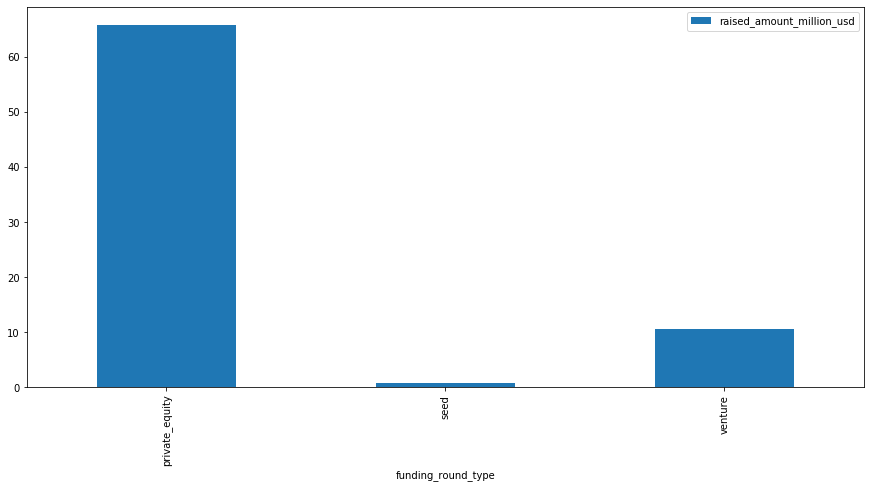

In [50]:
df = master_frame[(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='private_equity')].groupby('funding_round_type')['raised_amount_million_usd'].mean()
print(df.head())
df.plot.bar(legend=True, figsize=(15,7))

In [51]:
#df = master_frame[(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='private_equity')].groupby('funding_round_type').count()['raised_amount_usd']
df = master_frame.groupby('funding_round_type').count()['raised_amount_usd']
df

funding_round_type
angel              1401
private_equity     1089
seed               8120
venture           28381
Name: raised_amount_usd, dtype: int64

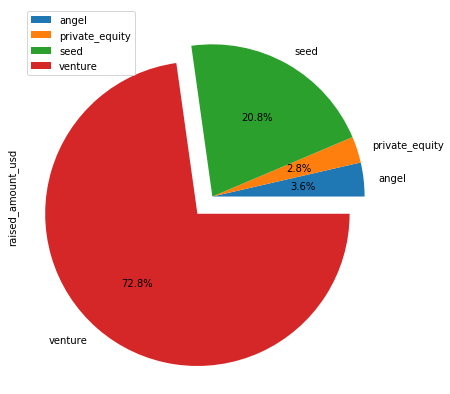

In [52]:
df.plot.pie(legend=True, explode = [0,0,0,0.15], figsize=(15,7), autopct='%1.1f%%')

**Observations from above 2 plots**
1. Private Equity funding round type average investment is around 65 million usd.
2. Seed Funding average investment is around 0.75 million usd.
3. **Ventures funding is the most suitable** as its average investment is around 10.5 million usd which lies in the range of the Spark's funding amount contstraint and most of the investments are in the venture funding only (around 72%).

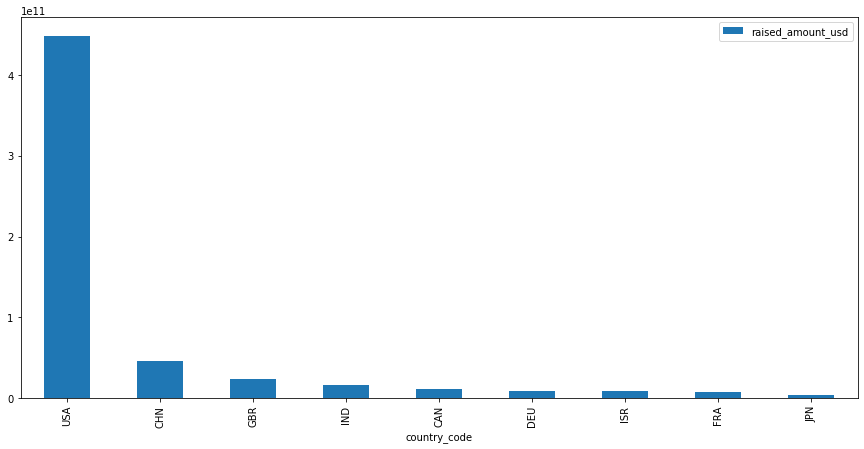

In [53]:
top9.plot.bar(legend = True, figsize=(15,7))

**Observations**
1. Top 5 countries where most of the invesments are being done are USA, CHINA, Great Britain, INDIA and CANADA.
2. Spark's Foundation wants to invest in the companies which are located in the English speaking countries. So, the top 3 countries suitable for them are - **USA, Great Britain and INDIA**.

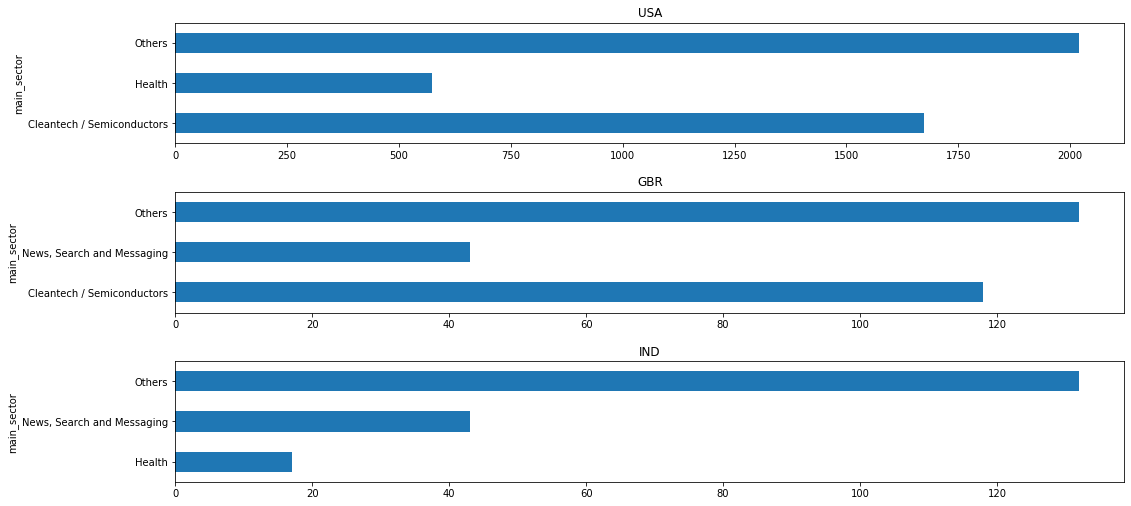

In [54]:
plt.subplot(3,1,1)
plt.tight_layout()
df = D1[(D1['main_sector']=='Others')|(D1['main_sector']=='Cleantech / Semiconductors')|(D1['main_sector']=='Health')].groupby('main_sector').count()['country_code']
df.plot.barh(title='USA', figsize = (15,7))

plt.subplot(3,1,2)
df = D2[(D2['main_sector']=='Others')|(D2['main_sector']=='Cleantech / Semiconductors')|(D2['main_sector']=='News, Search and Messaging')].groupby('main_sector').count()['country_code']
df.plot.barh(title='GBR', figsize = (15,7))

plt.subplot(3,1,3)
df = D2[(D2['main_sector']=='Others')|(D2['main_sector']=='Health')|(D2['main_sector']=='News, Search and Messaging')].groupby('main_sector').count()['country_code']
df.plot.barh(title='IND', figsize = (15,7))